100%|██████████| 79568/79568 [00:14<00:00, 5495.69it/s]


Loading training SMILES data.


100%|██████████| 1273077/1273077 [08:48<00:00, 2407.95it/s]


Data size: torch.Size([1273077, 111])

Loading validation SMILES data.


100%|██████████| 79567/79567 [00:33<00:00, 2403.14it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Data size: torch.Size([79567, 109])

Shows the initial molecular SMILES of the training data.
CCC(C)(C)Br
Convert to token.
tensor([1, 5, 5, 5, 4, 5, 5, 4, 5, 5, 3, 2])


You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | loss_func | CrossEntropyLoss | 0     
1 | model     | SmilesVAE        | 3.5 M 
-----------------------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.916    Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1243/1243 [06:09<00:00,  3.36it/s, loss=13.922, val_loss=13.966]
`Trainer.fit` stopped: `max_epochs=10` reached.


Training Finished!!!
success rate: 1.0


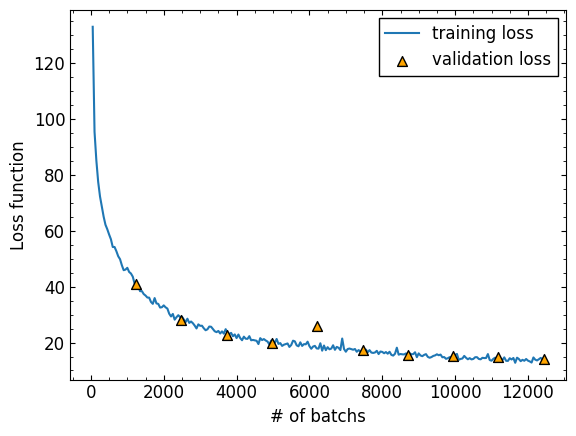

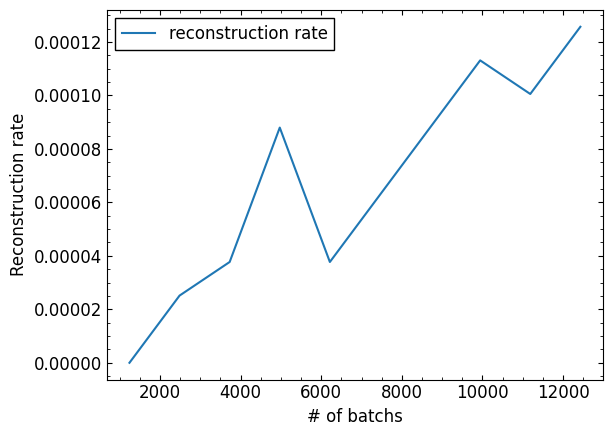

In [1]:
import warnings
import torch
from src import train
import selfies as sf
from tqdm import tqdm

warnings.simplefilter("ignore")


with open("data/train.smi") as f:
    train_smiles_list = f.readlines()
new_train_smiles_list = list()
for smiles in tqdm(train_smiles_list):
    try:
        if smiles.endswith("\n"):
            smiles = smiles.strip()
        sf.encoder(smiles)
        new_train_smiles_list.append(smiles)
    except:
        pass

with open("data/valid.smi") as f:
    valid_smiles_list = f.readlines()
new_valid_smiles_list = list()
for smiles in tqdm(valid_smiles_list):
    try:
        if smiles.endswith("\n"):
            smiles = smiles.strip()
        sf.encoder(smiles)
        new_valid_smiles_list.append(smiles)
    except:
        pass

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

train.run(
    new_train_smiles_list,
    new_valid_smiles_list,
    epochs=10,
    output_dir="./reports",
    batch_size=1024,
    device=device
)